<a href="https://colab.research.google.com/github/Precillieo/dsn20/blob/master/Voting_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DSN** **2020**

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import  roc_auc_score, accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import classification_report

from lightgbm import LGBMClassifier
!pip install rgf_python
from rgf.sklearn import RGFClassifier
from sklearn.ensemble import VotingClassifier
!pip install catboost
from catboost import CatBoostClassifier
import warnings


In [ ]:
train= pd.read_csv('/content/drive/My Drive/Bootcamp2020/Train.csv')
test= pd.read_csv("/content/drive/My Drive/Bootcamp2020/Test.csv")

In [ ]:
train.head(10)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.0000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.0000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.240,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.2820,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.0000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.000,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.0000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.190,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no
5,Apcnt_1000020,3724.0,NaN,0.0000,0.0,0.0000,192944.0,9244585.0,6761209.0,67963357.0,32902009.0,NaN,976390.0,2114215.0,16576457,NaN,0.0,0.0,0.0,0.0,0.0,8.385,NaN,NaN,4.845,2590.5,22083.0,14722.0,3772.0,22083.0,NaN,NaN,3858.0,31.0000,0.0,NaN,10.0,60.0,0.0,0.0,NaN,NaN,0.030558,12.12,0.382960,NaN,0.0,lending,NaN,0.000000,NaN,no
6,Apcnt_1000024,3350.0,0.24205,0.3132,0.0,2.8188,NaN,580388.0,NaN,96472.0,580388.0,631347.0,NaN,0.0,21973443,91602498.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,822.0,NaN,NaN,426.0,13413.0,NaN,13413.0,36.0,14.3334,0.0,NaN,12.0,2.0,2.0,0.0,153.8745,NaN,0.660000,1.01,0.513504,NaN,0.0,charge,NaN,2.146512,0.004390,yes
7,Apcnt_1000028,3416.0,0.87020,0.0570,0.0,0.0000,17505.0,186331.0,186331.0,1484813.0,326760.0,50959.0,1284089.0,5633109.0,11564970,18211813.0,0.0,0.0,0.0,1.0,1.0,124.980,8267.655,7755.00,82.680,1498.5,1734.0,1156.0,548.0,15240.0,182.0,NaN,460.0,5.5000,0.0,1.0,10.0,6.0,12.0,0.0,NaN,149.0190,0.137500,3.03,0.635960,NaN,0.0,charge,155.295994,0.946074,0.128389,no
8,Apcnt_1000036,3376.0,0.29180,0.5586,0.0,0.0000,18283.0,1105149.0,18283.0,115533.0,1557167.0,752715.0,97639.0,427511.0,11564970,NaN,0.0,0.0,0.0,1.0,2.0,126.495,NaN,NaN,126.495,1597.5,3195.0,2130.0,182.0,3741.0,1034.0,NaN,70.0,34.8334,1.0,NaN,14.0,0.0,8.0,0.0,NaN,102.2625,0.471427,4.04,0.410880,0.0,0.0,charge,NaN,0.641601,0.009990,no
9,Apcnt_1000040,3310.0,0.24395,0.1562,0.0,0.0000,NaN,0.0,NaN,NaN,0.0,208115.0,NaN,NaN,11564970,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,502.5,1278.0,852.0,182.0,9126.0,NaN,273.0,22.0,4.1666,0.0,1.0,4.0,0.0,4.0,0.0,150.0000,NaN,0.825000,1.01,0.800000,NaN,NaN,charge

In [ ]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,1649749.0,5446.0,0.0,48187375,114686147.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1086.0,6204.0,2676.0,60.0,14691.0,9794.0,NaN,238.0,1.8334,0.0,NaN,22.0,2.0,14.0,0.0,NaN,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,622789.0,1025793.0,1396510.0,34694910,87479487.0,1.0,1.0,1.0,2.0,2.0,142.560,NaN,NaN,570.585,3082.5,10221.0,6814.0,60.0,11955.0,3528.0,NaN,1216.0,19.5000,3.0,NaN,30.0,18.0,14.0,2.0,NaN,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,0.0,118256.0,NaN,NaN,21973443,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,852.0,4836.0,NaN,NaN,NaN,7.8334,0.0,NaN,2.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,1391064.0,1176725.0,1220293.0,16576457,NaN,2.0,2.0,2.0,3.0,3.0,109.005,13050.00,NaN,109.005,1414.5,4197.0,2798.0,60.0,14964.0,NaN,NaN,248.0,9.0000,1.0,1.0,36.0,0.0,26.0,0.0,NaN,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,271133.0,613064.0,4779643.0,48187375,72049802.0,0.0,0.0,0.0,3.0,3.0,139.065,469.29,469.29,15.180,2724.0,9855.0,6570.0,182.0,11679.0,5900.0,NaN,2388.0,16.6666,1.0,0.0,24.0,28.0,20.0,0.0,NaN,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Applicant_ID  24000 non-null  object 
 1   form_field1   22890 non-null  float64
 2   form_field2   22291 non-null  float64
 3   form_field3   23854 non-null  float64
 4   form_field4   23854 non-null  float64
 5   form_field5   23854 non-null  float64
 6   form_field6   18396 non-null  float64
 7   form_field7   21769 non-null  float64
 8   form_field8   18396 non-null  float64
 9   form_field9   20600 non-null  float64
 10  form_field10  23853 non-null  float64
 11  form_field11  10602 non-null  float64
 12  form_field12  19817 non-null  float64
 13  form_field13  21537 non-null  float64
 14  form_field14  24000 non-null  int64  
 15  form_field15  14408 non-null  float64
 16  form_field16  18526 non-null  float64
 17  form_field17  19305 non-null  float64
 18  form_field18  19631 non-nu

In [ ]:
train.isnull().sum()

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41    

In [ ]:
test.isnull().sum()

Applicant_ID        0
form_field1      1110
form_field2      1709
form_field3       146
form_field4       146
form_field5       146
form_field6      5604
form_field7      2231
form_field8      5604
form_field9      3400
form_field10      147
form_field11    13398
form_field12     4183
form_field13     2463
form_field14        0
form_field15     9592
form_field16     5474
form_field17     4695
form_field18     4369
form_field19        0
form_field20      147
form_field21     6707
form_field22     8724
form_field23    12125
form_field24     5605
form_field25     2256
form_field26     3172
form_field27     3910
form_field28      147
form_field29      147
form_field30    10908
form_field31    16810
form_field32     2256
form_field33      495
form_field34      147
form_field35     9866
form_field36      903
form_field37     2256
form_field38      147
form_field39     1829
form_field40    18828
form_field41    16349
form_field42      578
form_field43      250
form_field44     2362
form_field

In [ ]:
train.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50', 'default_status'],
      dtype='object')

In [ ]:
test.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50'],
      dtype='object')

In [ ]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,2.457900e+04,4.610500e+04,5.011100e+04,5.600000e+04,3.352500e+04,42964.000000,44849.000000,45598.000000,55996.000000,55645.000000,40146.000000,35600.000000,27877.000000,42703.000000,50550.000000,48562.000000,46701.000000,55645.000000,55645.000000,30491.000000,16592.000000,50550.000000,54744.000000,55645.000000,32852.000000,54005.000000,50550.000000,55645.000000,51789.000000,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,2.054715e+06,2.771113e+06,6.009944e+06,6.914875e+07,1.145041e+08,0.230425,0.265692,0.271832,0.948800,1.031593,86.500380,6628.316381,6452.875072,104.558516,2624.555935,10106.554899,6190.516948,17274.315141,16518.540695,5213.246663,10857.565755,938.345321,13.926583,0.230245,0.199866,12.859069,8.480435,8.601420,0.090849,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,4.912980e+06,4.544838e+06,2.335893e+07,2.713995e+09,1.153842e+08,0.621833,0.720198,0.725434,1.736454,1.785122,53.445528,5661.059297,5739.968774,436.670719,1964.226548,8796.472481,5390.915344,26930.742020,9666.183962,3124.491488,6049.678489,1044.597044,15.208396,0.683063,0.574002,10.621984,9.328810,7.969215,0.423802,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.395430e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166600,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,2.172565e+05,2.758010e+05,1.921660e+05,1.657646e+07,5.007636e+07,0.000000,0.000000,0.000000,0.000000,0.000000,40.305000,1068.667500,797.145000,14.865000,1231.500000,3375.000000,2068.000000,60.000000,9765.000000,2312.000000,6297.000000,194.000000,2.333400,0.000000,0.000000,6.000000,2.000000,4.000000,0.000000,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,6.986440e+05,1.163110e+06,1.605792e+06,2.814143e+07,8.442428e+07,0.000000,0.000000,0.000000,0.000000,0.000000,89.167500,5976.225000,5548.935000,60.660000,2203.500000,8214.000000,5110.000000,486.000000,15057.000000,5658.000000,10584.000000,598.000000,7.833400,0.000000,0.000000,10.000000,6.000000,6.000000,0.000000,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552

## Data Visualization

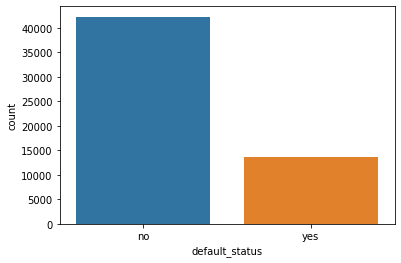

In [ ]:
import seaborn as sns
sns.countplot(x= train['default_status'])
plt.show()
#To show the number of yes(defaulting) and not(not defaulting)

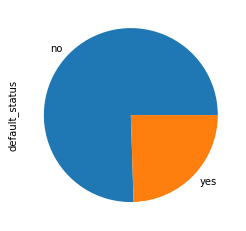

<Figure size 720x576 with 0 Axes>

In [ ]:
train.default_status.value_counts().plot(kind= 'pie')
plt.figure(figsize=(10, 8))
plt.show()
#A pie chart to make it more elaborate

Text(0.5, 1.0, 'Types of Product applied for')

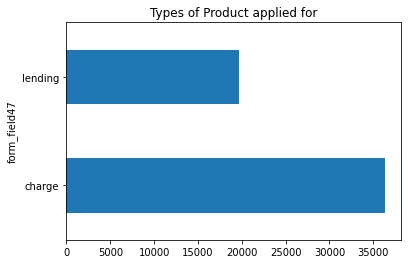

In [ ]:
train.groupby('form_field47')['form_field47'].count().sort_values(ascending=False).plot(kind='barh')
sns.set(style="darkgrid")
plt.title('Types of Product applied for')
#This shows that more people applied for the charge product than the lending product 

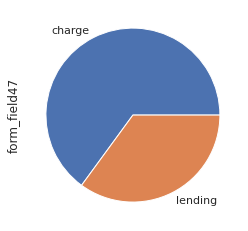

<Figure size 720x576 with 0 Axes>

In [ ]:
train.form_field47.value_counts().plot(kind= 'pie')
plt.figure(figsize=(10, 8))
plt.show()
#A pie chart for better view

### Severity Features Visualizations

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


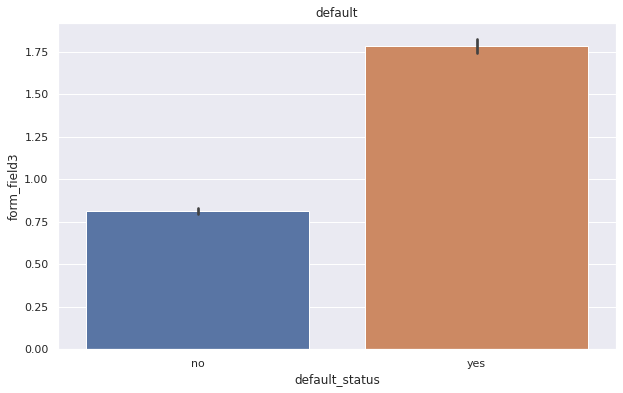

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(train['default_status'], train['form_field3'])
sns.set(style="darkgrid")
plt.title('default')
plt.show()
#This illustrates how many people defaulted on other loans while few didn't default.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


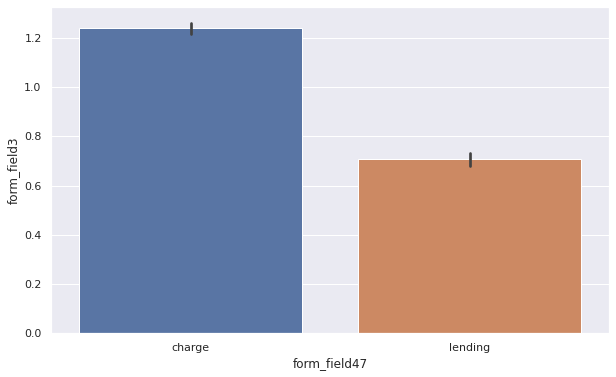

In [ ]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.barplot(train['form_field47'], train['form_field3'])
plt.show()
#Those that applied for the 'charge' product type default more than those that applied for 'lending' product type

### Risk Scoring Features Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


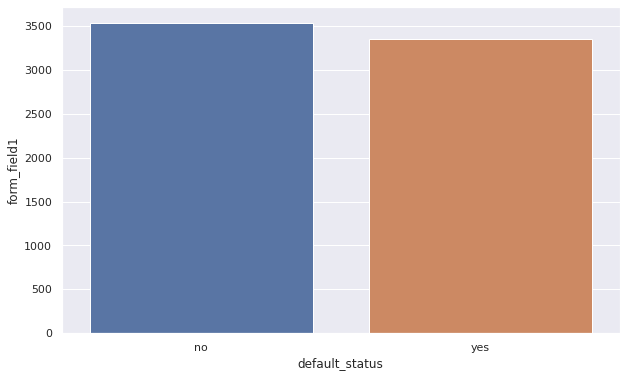

In [ ]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.barplot(train['default_status'], train['form_field1'])
plt.show()
#Most people with higher credit worthiness based on their historical data  didn't default while those with lower worthiness defaulted

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


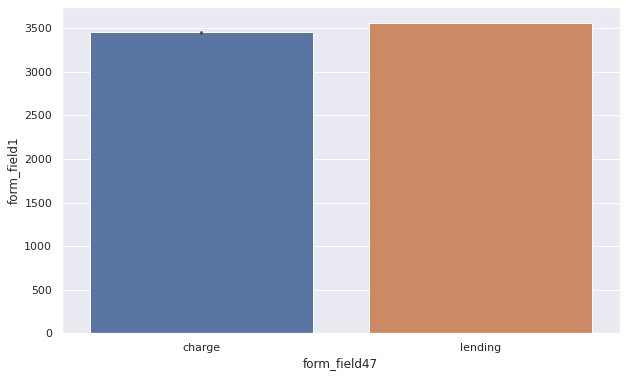

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(train['form_field47'], train['form_field1'])
sns.set(style="darkgrid")
plt.show()
#Customers with higher credit worthiness applied for 'lending' product type while lower ones applied for 'charge' product

### Credit Card Features

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


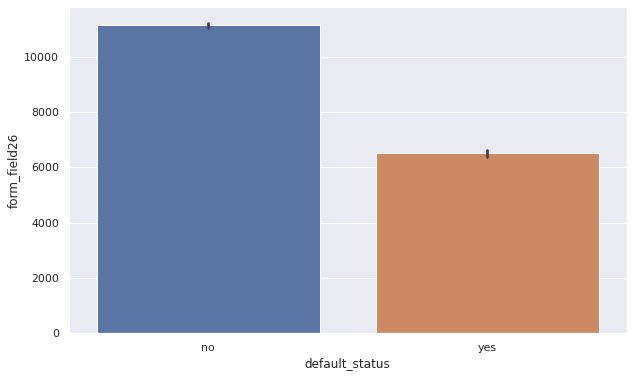

In [ ]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.barplot(train['default_status'], train['form_field26'])
plt.show()
#Customers with higher tenure of old credit cards didn't default, those with  lower tenure defaulted

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


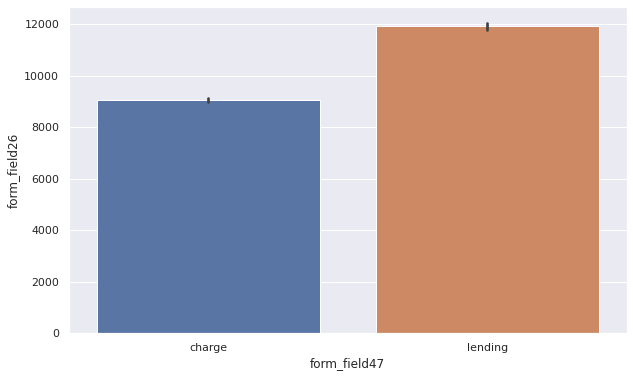

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(train['form_field47'], train['form_field26'])
sns.set(style="darkgrid")
plt.show()
#Most people with higher tenure of old credit card applied for 'lending' product, those with lower tenure are for the 'charge' product type

## Credit Features

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


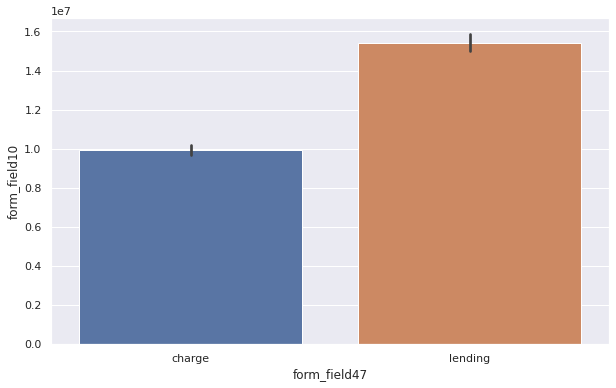

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(train['form_field47'], train['form_field10'])
sns.set(style="darkgrid")
plt.show()
#Those that applied for 'lending' product have higher amount of credit available on their credit line

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


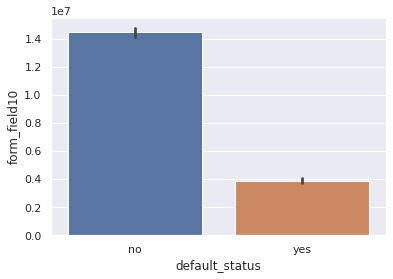

In [ ]:
sns.barplot(train['default_status'], train['form_field10'])
sns.set(style="darkgrid")
plt.show()
#Most customers with higher amount credit available on their credit line didn't default

## Time Related Features Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


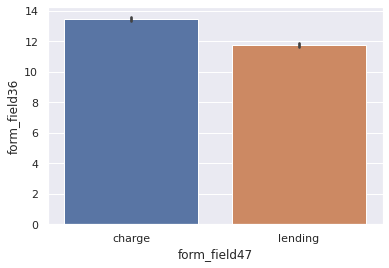

In [ ]:
sns.barplot(train['form_field47'], train['form_field36'])
sns.set(style="darkgrid")
plt.show()
#Customers that applied for 'charge' product type have higher number of active credit lines

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


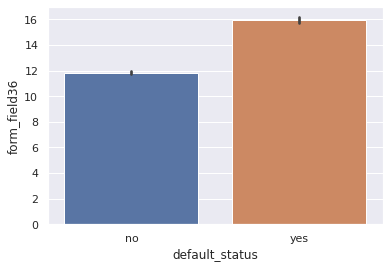

In [ ]:
sns.barplot(train['default_status'], train['form_field36'])
sns.set(style="darkgrid")
plt.show()
#Customers with higher number of active credit lines didn't default

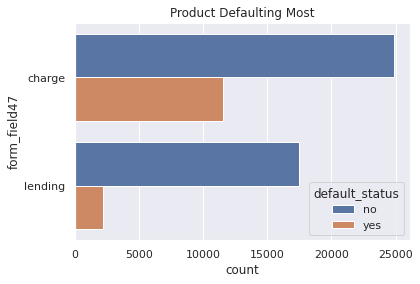

In [ ]:
sns.set(style="darkgrid")
sns.countplot( y= "form_field47", hue= "default_status", data= train)
plt.title("Product Defaulting Most")
plt.show()
#Ratio of those not defaulting in both of the products is higher to those defaulting

## **DEALING** **WITH** **MISSING** **VALUES**

In [ ]:
columns= ('form_field1', 'form_field2', 'form_field3', 'form_field4', 'form_field5', 'form_field6', 'form_field7', 'form_field8', 'form_field9', 'form_field10', 'form_field11', 'form_field12', 'form_field13', 'form_field17', 'form_field15', 'form_field16', 'form_field18', 'form_field19', 'form_field20', 'form_field21', 'form_field22', 'form_field23', 'form_field24', 'form_field25', 'form_field26', 'form_field27', 'form_field28', 'form_field29', 'form_field30', 'form_field31', 'form_field32', 'form_field33', 'form_field34', 'form_field35', 'form_field36', 'form_field37', 'form_field38', 'form_field39', 'form_field40', 'form_field41', 'form_field42', 'form_field43', 'form_field44', 'form_field45', 'form_field46', 'form_field48','form_field49','form_field50')
for cod in columns:
  test[cod]= test[cod].fillna(-9999)

test.isnull().sum()

Applicant_ID    0
form_field1     0
form_field2     0
form_field3     0
form_field4     0
form_field5     0
form_field6     0
form_field7     0
form_field8     0
form_field9     0
form_field10    0
form_field11    0
form_field12    0
form_field13    0
form_field14    0
form_field15    0
form_field16    0
form_field17    0
form_field18    0
form_field19    0
form_field20    0
form_field21    0
form_field22    0
form_field23    0
form_field24    0
form_field25    0
form_field26    0
form_field27    0
form_field28    0
form_field29    0
form_field30    0
form_field31    0
form_field32    0
form_field33    0
form_field34    0
form_field35    0
form_field36    0
form_field37    0
form_field38    0
form_field39    0
form_field40    0
form_field41    0
form_field42    0
form_field43    0
form_field44    0
form_field45    0
form_field46    0
form_field47    0
form_field48    0
form_field49    0
form_field50    0
dtype: int64

In [ ]:
cols= ('form_field1', 'form_field2', 'form_field3', 'form_field4', 'form_field5', 'form_field6', 'form_field7', 'form_field8', 'form_field9', 'form_field10', 'form_field11', 'form_field12', 'form_field13', 'form_field17', 'form_field15', 'form_field16', 'form_field18', 'form_field19', 'form_field20', 'form_field21', 'form_field22', 'form_field23', 'form_field24', 'form_field25', 'form_field26', 'form_field27', 'form_field28', 'form_field29', 'form_field30', 'form_field31', 'form_field32', 'form_field33', 'form_field34', 'form_field35', 'form_field36', 'form_field37', 'form_field38', 'form_field39', 'form_field40', 'form_field41', 'form_field42', 'form_field43', 'form_field44', 'form_field45', 'form_field46', 'form_field48','form_field49','form_field50')
for col in cols:
  train[col]= train[col].fillna(-9999)

train.isnull().sum()

Applicant_ID      0
form_field1       0
form_field2       0
form_field3       0
form_field4       0
form_field5       0
form_field6       0
form_field7       0
form_field8       0
form_field9       0
form_field10      0
form_field11      0
form_field12      0
form_field13      0
form_field14      0
form_field15      0
form_field16      0
form_field17      0
form_field18      0
form_field19      0
form_field20      0
form_field21      0
form_field22      0
form_field23      0
form_field24      0
form_field25      0
form_field26      0
form_field27      0
form_field28      0
form_field29      0
form_field30      0
form_field31      0
form_field32      0
form_field33      0
form_field34      0
form_field35      0
form_field36      0
form_field37      0
form_field38      0
form_field39      0
form_field40      0
form_field41      0
form_field42      0
form_field43      0
form_field44      0
form_field45      0
form_field46      0
form_field47      0
form_field48      0
form_field49      0


In [ ]:
train.dtypes

Applicant_ID       object
form_field1       float64
form_field2       float64
form_field3       float64
form_field4       float64
form_field5       float64
form_field6       float64
form_field7       float64
form_field8       float64
form_field9       float64
form_field10      float64
form_field11      float64
form_field12      float64
form_field13      float64
form_field14        int64
form_field15      float64
form_field16      float64
form_field17      float64
form_field18      float64
form_field19      float64
form_field20      float64
form_field21      float64
form_field22      float64
form_field23      float64
form_field24      float64
form_field25      float64
form_field26      float64
form_field27      float64
form_field28      float64
form_field29      float64
form_field30      float64
form_field31      float64
form_field32      float64
form_field33      float64
form_field34      float64
form_field35      float64
form_field36      float64
form_field37      float64
form_field38

In [ ]:
test.dtypes

Applicant_ID     object
form_field1     float64
form_field2     float64
form_field3     float64
form_field4     float64
form_field5     float64
form_field6     float64
form_field7     float64
form_field8     float64
form_field9     float64
form_field10    float64
form_field11    float64
form_field12    float64
form_field13    float64
form_field14      int64
form_field15    float64
form_field16    float64
form_field17    float64
form_field18    float64
form_field19    float64
form_field20    float64
form_field21    float64
form_field22    float64
form_field23    float64
form_field24    float64
form_field25    float64
form_field26    float64
form_field27    float64
form_field28    float64
form_field29    float64
form_field30    float64
form_field31    float64
form_field32    float64
form_field33    float64
form_field34    float64
form_field35    float64
form_field36    float64
form_field37    float64
form_field38    float64
form_field39    float64
form_field40    float64
form_field41    

In [ ]:
cat= ('form_field47', 'Applicant_ID', 'default_status')
for x in cat:
  le= LabelEncoder()
  train[x]= le.fit_transform(train[x].values)
  

In [ ]:
cats= ('form_field47', 'Applicant_ID')
for y in cats:
  le= LabelEncoder()
  test[y]= le.fit_transform(test[y].values)
  

## **FEATURE** **ENGINEERING**

In [ ]:
train.dtypes

Applicant_ID        int64
form_field1       float64
form_field2       float64
form_field3       float64
form_field4       float64
form_field5       float64
form_field6       float64
form_field7       float64
form_field8       float64
form_field9       float64
form_field10      float64
form_field11      float64
form_field12      float64
form_field13      float64
form_field14        int64
form_field15      float64
form_field16      float64
form_field17      float64
form_field18      float64
form_field19      float64
form_field20      float64
form_field21      float64
form_field22      float64
form_field23      float64
form_field24      float64
form_field25      float64
form_field26      float64
form_field27      float64
form_field28      float64
form_field29      float64
form_field30      float64
form_field31      float64
form_field32      float64
form_field33      float64
form_field34      float64
form_field35      float64
form_field36      float64
form_field37      float64
form_field38

In [ ]:
train['form_field3233']= (train.form_field32 + train.form_field33) / 2
train.form_field3233

0         530.0000
1        1285.7500
2          35.3333
3         264.9167
4         136.5000
           ...    
55995     442.8333
55996     128.3333
55997     127.1667
55998      80.7500
55999     705.4167
Name: form_field3233, Length: 56000, dtype: float64

In [ ]:
test['form_field3233']= (test.form_field32 + test.form_field33) / 2
test.form_field3233

0         119.9167
1         617.7500
2       -4995.5833
3         128.5000
4        1202.3333
           ...    
23995      12.1667
23996     300.0833
23997     103.6667
23998      32.3333
23999     829.4167
Name: form_field3233, Length: 24000, dtype: float64

In [ ]:
y= train['default_status']


In [ ]:
train= train.drop(['form_field32', 'form_field33', 'Applicant_ID', 'default_status'], axis=1)
test= test.drop(['form_field32', 'form_field33', 'Applicant_ID'], axis= 1)

In [ ]:
scaler = MinMaxScaler()
scaling_train= DataFrame(scaler.fit_transform(train))
#scaling_train = DataFrame(scaling_train)

In [ ]:

scaling_test= DataFrame(scaler.transform(test))
#scaling_test = DataFrame(scaling_test)

## **MODELLING**

In [ ]:
cb_params={
    'n_estimators': 2500,
    'learning_rate':0.01,
    'random_seed': 3500,
    'objective':'CrossEntropy',
    'eval_metric': 'AUC',
    'max_depth': 8,
    'thread_count': -1,
}

In [ ]:
cb= CatBoostClassifier(verbose= False, random_state= 999)
cb1= CatBoostClassifier(**cb_params)
rgf= RGFClassifier(max_leaf= 1500)

In [ ]:
scorevalid, scoretest= [], []
layers= StratifiedKFold(n_splits= 15, shuffle= True, random_state= 999)

In [ ]:
vote= VotingClassifier(estimators= [('rgf', rgf),('cb', cb),('cb1', cb1)],
                                    voting= 'soft', n_jobs= -1)


In [ ]:
for  i, (trainvalue, valvalue) in enumerate (layers.split(scaling_train, y)):
  train_x, val_x=  scaling_train.iloc[trainvalue], scaling_train.iloc[valvalue]
  train_y, val_y= y.iloc[trainvalue], y.iloc[valvalue]
  print('#'*50 + 'fold'+ str(i))

  vote.fit(train_x, train_y)
  pred= vote.predict_proba(val_x)[:,1]
  valpred= roc_auc_score(val_y, pred)
  scorevalid.append(valpred)

  predict= vote.predict_proba(scaling_test)[:, 1]
  scoretest.append(predict)


##################################################fold0
##################################################fold1
##################################################fold2
##################################################fold3
##################################################fold4
##################################################fold5
##################################################fold6


KeyboardInterrupt: ignored

In [ ]:
print(np.mean(scorevalid))

0.8418853836359738


In [ ]:
result= pd.DataFrame(scorevalid).T

In [ ]:
result.head()

,0,1,2,3,4,5
0,0.838702,0.837054,0.837183,0.85715,0.831567,0.849656


In [ ]:
scoretest

[array([0.32286979, 0.37420155, 0.39003947, ..., 0.24229055, 0.50536655,
        0.19979786]),
 array([0.27063964, 0.36964379, 0.4186009 , ..., 0.2819921 , 0.53855351,
        0.19727601]),
 array([0.27084121, 0.33637304, 0.40804398, ..., 0.26095072, 0.53776363,
        0.18126886]),
 array([0.28929936, 0.33305792, 0.40018038, ..., 0.26331023, 0.5052118 ,
        0.19677236]),
 array([0.30875548, 0.37192853, 0.3838298 , ..., 0.27593839, 0.51276986,
        0.17880853]),
 array([0.29805062, 0.35934191, 0.41514548, ..., 0.27372134, 0.50943186,
        0.18180187])]

In [ ]:

final_pred= np.mean(scoretest, axis=0)

In [ ]:
sub= pd.read_csv('/content/drive/My Drive/Bootcamp2020/SampleSubmission.csv')
sub.head()

,Applicant_ID,default_status
0,Apcnt_1000032,1
1,Apcnt_1000048,1
2,Apcnt_1000052,1
3,Apcnt_1000076,1
4,Apcnt_1000080,1


In [ ]:
sub['default_status']= final_pred
sub.head()

,Applicant_ID,default_status
0,Apcnt_1000032,0.293409
1,Apcnt_1000048,0.357424
2,Apcnt_1000052,0.402640
3,Apcnt_1000076,0.768291
4,Apcnt_1000080,0.169281


In [ ]:
sub.to_csv('finale.csv', index = False)